# Building a Custom Visualization

---

Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.

**Analysis Objectives:**

1. Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.

2. Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

3. Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

<IPython.core.display.Javascript object>


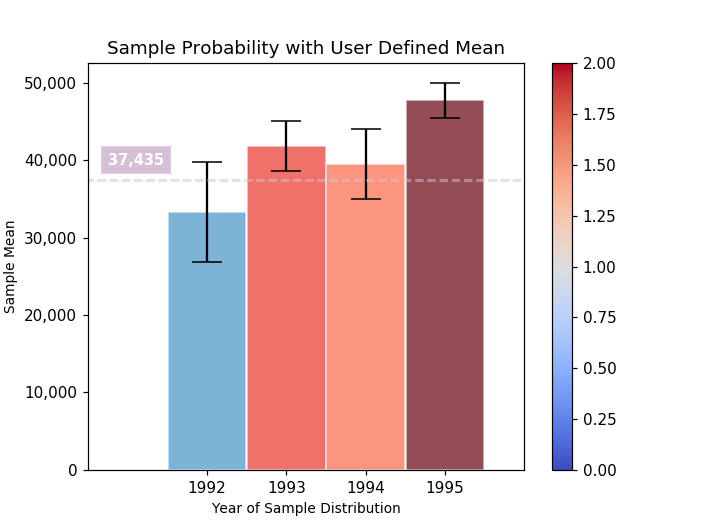

7

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cm
from matplotlib import colors as col
%matplotlib notebook

# Setting color maps
red = cm.Reds
blue = cm.Blues
# Setting seed to ensure reproducibility
np.random.seed(12345)

# Simulate random data to create flexible bar graphs 
df = pd.DataFrame([np.random.normal(32000,200000,3650),
                   np.random.normal(43000,100000,3650),
                   np.random.normal(43500,140000,3650),
                   np.random.normal(48000,70000,3650)],
                  index=[1992,1993,1994,1995])

# Calculate average and margin of error based on 95% confidence
df['mean'] = df.mean(axis = 1)
df['MoE'] = (df.std(axis=1) / (3650**0.5)) * 1.96

# Display basic visualization
plt.figure()
xvals = range(len(df.index))

# Customize visualization axis limits, titles, style, etc,.
plt.bar(xvals, df['mean'].values, width = 0.99, edgecolor ='w', yerr = df['MoE'].values, capsize = 10, color = 'grey', alpha = 0.7)
plt.xticks(range(len(df.index)), df.index)
ax = plt.gca()
ax.set_xlim([-1.5,4])
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, t: format(int(x), ',')))
plt.title('Sample Probability - Default Values')
plt.ylabel('Sample Mean', fontsize = 9)
plt.xlabel('Year of Sample Distribution', fontsize = 9)

# Set up color legend
norm = col.Normalize(vmin=0, vmax=2)
c_m = plt.cm.coolwarm
s_m = cm.ScalarMappable(cmap=c_m, norm = norm)
s_m.set_array([])
plt.colorbar(s_m)

# Enable an onclick event to display interactive axeline on the graph based on user selection
def onclick(event):
    plt.cla()
    y = event.ydata
    ylab = '{:,}'.format(int(y))
    near = 100
    df['diff'] = ((y - df['mean']) // near) * near
    df['sign'] = abs(df['diff']) / df['diff']
    old_range = abs(df['diff']).min(), abs(df['diff']).max()
    new_range = 0.5, 1
    df['shade'] = df['sign'] * np.interp(abs(df['diff']), old_range, new_range)
    colors = ['white' if x == 0 else red(abs(x)) if x < 0 else blue(abs(x)) for x in df['shade'].values]

    plt.bar(xvals, df['mean'].values, width = 0.99, edgecolor ='w', yerr = df['MoE'].values, capsize = 10, color = colors, alpha = 0.7)
    plt.xticks(range(len(df.index)), df.index)
    ax = plt.gca()
    ax.set_xlim([-1.5,4])
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, t: format(int(x), ',')))
    plt.text(-1.25, event.ydata+2000, ylab, backgroundcolor = 'thistle', color = 'w', name = 'Arial Narrow', size = 9.5, weight = 'bold')
    plt.axhline(y, -1.5, 4, color = 'thistle', linestyle = '--', linewidth = 2, alpha = 0.5)
    plt.xlabel('Year of Sample Distribution', fontsize = 9)
    plt.ylabel('Sample Mean', fontsize = 9)
    plt.title('Sample Probability with User Defined Mean')


plt.gcf().canvas.mpl_connect('button_press_event', onclick)
